# Exploring Data with Pandas: Fundamentals

In the last lesson, we learned the basics of the pandas library. We explored the primary data structure in pandas, the dataframe, and learned some of the ways pandas makes working with data easier than NumPy:

- Axis values in dataframes can have string labels, not just numeric ones, which makes selecting data much easier.
- Dataframes can contain columns with multiple data types: including integer, float, and string.

In this lesson, we'll learn another way pandas makes working with data easier. It has many built-in methods and functions for common exploration and analysis tasks. As we learn these, we'll also explore how pandas uses many of the concepts we learned in the NumPy lessons, including vectorized operations and boolean indexing.

We'll continue working with a data set from [Fortune](http://fortune.com/) magazine's [Global 500 list](https://en.wikipedia.org/wiki/Fortune_Global_500) 2017, which ranks the top 500 corporations worldwide by revenue. The data set was originally compiled [here](https://data.world/chasewillden/fortune-500-companies-2017); however, we modified the original data set to make it more accessible.

Here is a data dictionary for some of the columns in the CSV:

- company: Name of the company.
- rank: Global 500 rank for the company.
- revenues: Company's total revenue for the fiscal year, in millions of dollars (USD).
- revenue_change: Percentage change in revenue between the current and prior fiscal year.
- profits: Net income for the fiscal year, in millions of dollars (USD).
- ceo: Company's Chief Executive Officer.
- industry: Industry in which the company operates.
- sector: Sector in which the company operates.
- previous_rank: Global 500 rank for the company for the prior year.
- country: Country in which the company is headquartered.
- hq_location: City and Country, (or City and State for the USA) where the company is headquarted.
- employees: Total employees (full-time equivalent, if available) at fiscal year-end.

In [1]:
import pandas as pd

In [6]:
f500 = pd.read_csv('../Datasets/f500.csv', index_col=0)
f500.index.name = 0

In [7]:
f500.head()

,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity
0,,,,,,,,,,,,,,,,
Walmart,1,485873,0.8,13643.0,198825,-7.2,C. Douglas McMillon,General Merchandisers,Retailing,1,USA,"Bentonville, AR",http://www.walmart.com,23,2300000,77798
State Grid,2,315199,-4.4,9571.3,489838,-6.2,Kou Wei,Utilities,Energy,2,China,"Beijing, China",http://www.sgcc.com.cn,17,926067,209456
Sinopec Group,3,267518,-9.1,1257.9,310726,-65.0,Wang Yupu,Petroleum Refining,Energy,4,China,"Beijing, China",http://www.sinopec.com,19,713288,106523
China National Petroleum,4,262573,-12.3,1867.5,585619,-73.7,Zhang Jianhua,Petroleum Refining,Energy,3,China,"Beijing, China",http://www.cnpc.com.cn,17,1512048,301893
Toyota Motor,5,254694,7.7,16899.3,437575,-12.3,Akio Toyoda,Motor Vehicles and Parts,Motor Vehicles & Parts,8,Japan,"Toyota, Japan",http://www.toyota-global.com,23,364445,157210


In [8]:
f500.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Walmart to AutoNation
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   rank                      500 non-null    int64  
 1   revenues                  500 non-null    int64  
 2   revenue_change            498 non-null    float64
 3   profits                   499 non-null    float64
 4   assets                    500 non-null    int64  
 5   profit_change             436 non-null    float64
 6   ceo                       500 non-null    object 
 7   industry                  500 non-null    object 
 8   sector                    500 non-null    object 
 9   previous_rank             500 non-null    int64  
 10  country                   500 non-null    object 
 11  hq_location               500 non-null    object 
 12  website                   500 non-null    object 
 13  years_on_global_500_list  500 non-null    int64  
 14  em

## Vectorized Operations

Because pandas is designed to operate like NumPy, a lot of concepts and methods from Numpy are supported. Recall that one of the ways NumPy makes working with data easier is with vectorized operations, or operations applied to multiple data points at once:

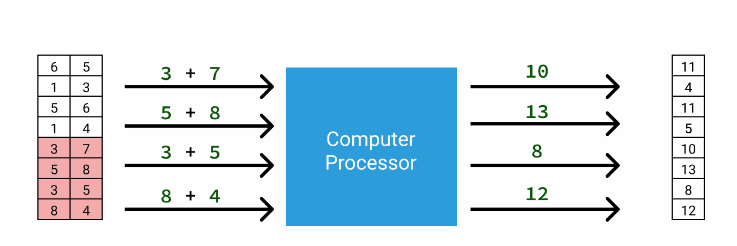

Vectorization not only improves our code's performance, but also enables us to write code more quickly.

Because pandas is an extension of NumPy, it also supports vectorized operations. Let's look at an example of how this would work with a pandas series:

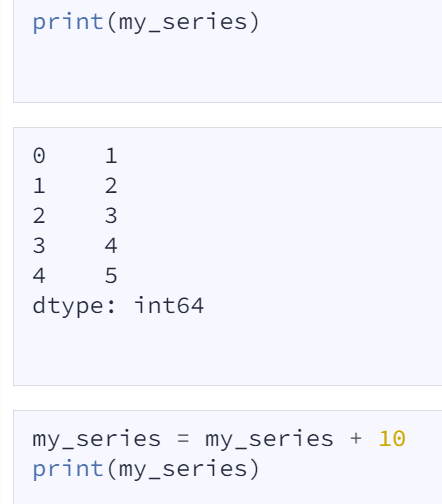

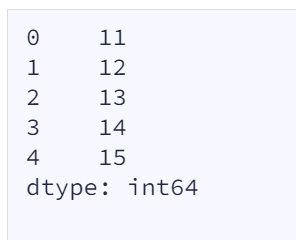

Just like with NumPy, we can use any of the standard [Python numeric operators](https://docs.python.org/3/library/stdtypes.html#numeric-types-int-float-complex) with series, including:

- series_a + series_b - Addition
- series_a - series_b - Subtraction
- series_a * series_b - Multiplication (this is unrelated to - the multiplications used in linear algebra).
series_a / series_b - Division

Recall that our f500 dataframe includes each company's current and previous year's rank on the Fortune 500 list. Let's use vectorized operations to calculate the changes in rank for each company. To achieve this, we'll subtract the current rank column from the previous_rank column. This determines whether a particular company moved upwards or downwards. A positive result indicates improved ranking, while a negative result indicates a drop in ranking. A zero result means the company retained its position.

In [11]:
rank_change = f500['previous_rank'] - f500['rank']
rank_change

0
Walmart                             0
State Grid                          0
Sinopec Group                       1
China National Petroleum           -1
Toyota Motor                        3
                                 ... 
Teva Pharmaceutical Industries   -496
New China Life Insurance          -70
Wm. Morrison Supermarkets         -61
TUI                               -32
AutoNation                       -500
Length: 500, dtype: int64

##  Series Data Exploration Methods

We can observe from the results that Sinopec Group and Toyota Motor each increased in rank from the previous year, while China National Petroleum dropped a spot. However, what if we wanted to find the biggest increase or decrease in rank?

Like NumPy, pandas supports many descriptive stats methods that can help us answer these questions. Here are a few of the most useful ones (with links to documentation):

- Series.max()
- Series.min()
- Series.mean()
- Series.median()
- Series.mode()
- Series.sum()

Let's use some of these methods to confirm the biggest increase and biggest decrease in rank!

In [12]:
rank_change.min()

-500

In [13]:
rank_change.max()

226

- Biggest increase in rank: 226
- Biggest decrease in rank: -500

However, according to the data dictionary, this list should only rank companies on a scale of 1 to 500. Even if the company ranked 1st in the previous year moved to 500th this year, the rank change calculated would be -499. This indicates that there is incorrect data in either the rank column or previous_rank column.

Next, we'll learn another method that can help us more quickly investigate this issue - the Series.describe() method. This method tells us how many non-null values are contained in the series, along with the mean, minimum, maximum, and other statistics we'll learn about later in this path.

Let's look at an example:

In [14]:
assets = f500["assets"]
print(assets.describe())

count    5.000000e+02
mean     2.436323e+05
std      4.851937e+05
min      3.717000e+03
25%      3.658850e+04
50%      7.326150e+04
75%      1.805640e+05
max      3.473238e+06
Name: assets, dtype: float64


You may notice that the values in the code segment above look a little bit different. Because the values for this column are too long to neatly display, pandas has displayed them in E-notation, a type of [scientific notation](https://en.wikipedia.org/wiki/Scientific_notation):

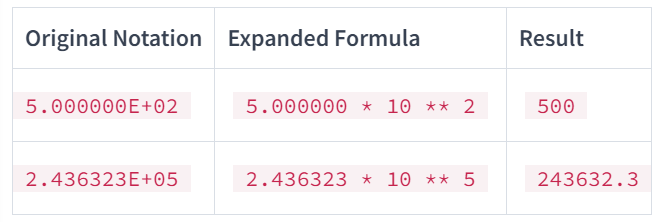

If we use describe() on a column that contains non-numeric values, we get some different statistics. Let's look at an example:

In [15]:
f500['country'].describe()

count     500
unique     34
top       USA
freq      132
Name: country, dtype: object

The first statistic, count, is the same as for numeric columns, showing us the number of non-null values. The other three statistics are new:

- unique: Number of unique values in the series. In this case, it tells us that there are 34 different countries represented in the Fortune 500.
- top: Most common value in the series. The USA is the country that headquarters the most Fortune 500 companies.
- freq: Frequency of the most common value. Exactly 132 companies from the Fortune 500 are headquartered in the USA.


Let's use this method to gather more information about the rank and previous_rank series.

In [16]:
f500['rank'].describe()

count    500.000000
mean     250.500000
std      144.481833
min        1.000000
25%      125.750000
50%      250.500000
75%      375.250000
max      500.000000
Name: rank, dtype: float64

In [18]:
f500['previous_rank'].describe()

count    500.000000
mean     222.134000
std      146.941961
min        0.000000
25%       92.750000
50%      219.500000
75%      347.250000
max      500.000000
Name: previous_rank, dtype: float64

## Method Chaining

When you reviewed the results you might have noticed something odd - the minimum value for the previous_rank column is 0:

In [19]:
prev_rank = f500["previous_rank"]
print(prev_rank.describe())

count    500.000000
mean     222.134000
std      146.941961
min        0.000000
25%       92.750000
50%      219.500000
75%      347.250000
max      500.000000
Name: previous_rank, dtype: float64


However, this column should only have values between 1 and 500 (inclusive), so a value of 0 doesn't make sense. To investigate the possible cause of this issue, let's confirm the number of 0 values that appear in the previous_rank column.

Recall that in the last lesson, we learned how to use the Series.value_counts() method to display the counts of the unique values in a column:

In [20]:
countries = f500["country"]
countries_counts = countries.value_counts()
countries_counts

country
USA             132
China           109
Japan            51
Germany          29
France           29
Britain          24
South Korea      15
Netherlands      14
Switzerland      14
Canada           11
Spain             9
Australia         7
Brazil            7
India             7
Italy             7
Taiwan            6
Russia            4
Ireland           4
Singapore         3
Sweden            3
Mexico            2
Malaysia          1
Thailand          1
Belgium           1
Norway            1
Luxembourg        1
Indonesia         1
Denmark           1
Saudi Arabia      1
Finland           1
Venezuela         1
Turkey            1
U.A.E             1
Israel            1
Name: count, dtype: int64

Rather than assigning the countries series to it's own variable, we can actually skip that step and use the method directly on the result of the column selection:

In [21]:
countries_counts = f500["country"].value_counts()

This is called `method chaining` — a way to combine multiple methods together in a single line.

In the last lesson, we also learned how to use Series.loc[] to select just one item from a series by label. For example, in order to select just the counts for China, we would use the following line of code:

In [22]:
print(f500["country"].value_counts().loc["China"])

109


From here, you'll see method chaining more often in our lessons. When writing code, always assess whether method chaining will make your code harder to read. If it does, it's always preferable to break the code into more than one line.

Let's use the Series.value_counts() method and Series.loc next to confirm the number of 0 values in the previous_rank column.

In [25]:
f500['previous_rank'].value_counts().loc[0]

33

## Dataframe Exploration Methods

Given that multiple companies have a 0 rank, we might (correctly) conclude that these companies didn't have a rank at all for the previous year. By definition, this means that the previous_rank for these companies is not a number! Therefore, it makes sense for us to replace these values with a NaN value instead of using a 0 to represent missing data. There are many advantages to doing this. A few of them are listed below:

- Improved data analysis: By using NaN values to represent missing data, the rest of the data can still be analyzed and processed, allowing for a better understanding of the patterns and relationships in the data.

- Improved readability: Datasets that use NaN values to represent missing data are more readable, as it clearly indicates the presence of missing values in the dataset.

- Easy representation of missing data: By using NaN values, missing data in a dataset can be easily represented and identified, rather than using placeholder values such as 0 or -1 which can make interpreting results of calculations very difficult or misleading.

Before we correct these values, let's explore the rest of our dataframe to make sure there are no other data issues. Just like we used descriptive stats methods to explore individual series, we can also use descriptive stats methods to explore our f500 dataframe.

Because series and dataframes are two distinct objects, they have their own unique methods. However, there are many times where both series and dataframe objects have a method of the same name that behaves in similar ways. Below are some examples:

- Series.min() and DataFrame.min()
- Series.mean() and DataFrame.mean()
- Series.median() and DataFrame.median()
- Series.mode() and DataFrame.mode()
- Series.sum() and DataFrame.sum()

Unlike their series counterparts, dataframe methods require an axis parameter so we know which axis to calculate across. While you can use integers to refer to the first and second axis, pandas dataframe methods also accept the strings "index" and "columns" for the axis parameter:

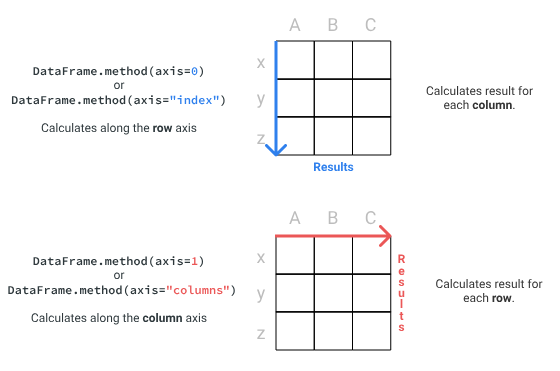

For instance, if we wanted to find the median (middle) value for the revenues and profits columns, we could use the following code:

In [26]:
medians = f500[["revenues", "profits"]].median(axis=0)
# we could also use .median(axis="index")
print(medians)

revenues    40236.0
profits      1761.6
dtype: float64


In fact, the default value for the axis parameter with these methods is axis=0. We could have just used the median() method without a parameter to get the same result!

In [27]:
f500.max(numeric_only=True)

rank                            500.0
revenues                     485873.0
revenue_change                  442.3
profits                       45687.0
assets                      3473238.0
profit_change                  8909.5
previous_rank                   500.0
years_on_global_500_list         23.0
employees                   2300000.0
total_stockholder_equity     301893.0
dtype: float64

## Dataframe Describe Method

Based on the column descriptions, the maximum for each of these columns seems reasonable.

Like series objects, dataframe objects also have a [DataFrame.describe() method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) that we can use to explore the dataframe more quickly. We encourage you to take a look at the documentation using the link in the previous sentence to familiarize yourself with some of the differences between the two methods.

One difference is that we need to manually specify if you want to see the statistics for the non-numeric columns. By default, DataFrame.describe() will return statistics for only numeric columns. If we wanted to get just the object columns, we need to use the include=['O'] parameter:

In [28]:
f500.describe(include=['O'])

,ceo,industry,sector,country,hq_location,website
count,500,500,500,500,500,500
unique,500,58,21,34,235,500
top,C. Douglas McMillon,Banks: Commercial and Savings,Financials,USA,"Beijing, China",http://www.walmart.com
freq,1,51,118,132,56,1


In [29]:
f500.describe()

,rank,revenues,revenue_change,profits,assets,profit_change,previous_rank,years_on_global_500_list,employees,total_stockholder_equity
count,500.000000,500.000000,498.000000,499.000000,5.000000e+02,436.000000,500.000000,500.000000,5.000000e+02,500.000000
mean,250.500000,55416.358000,4.538353,3055.203206,2.436323e+05,24.152752,222.134000,15.036000,1.339983e+05,30628.076000
std,144.481833,45725.478963,28.549067,5171.981071,4.851937e+05,437.509566,146.941961,7.932752,1.700878e+05,43642.576833
min,1.000000,21609.000000,-67.300000,-13038.000000,3.717000e+03,-793.700000,0.000000,1.000000,3.280000e+02,-59909.000000
25%,125.750000,29003.000000,-5.900000,556.950000,3.658850e+04,-22.775000,92.750000,7.000000,4.293250e+04,7553.750000
50%,250.500000,40236.000000,0.550000,1761.600000,7.326150e+04,-0.350000,219.500000,17.000000,9.291050e+04,15809.500000
75%,375.250000,63926.750000,6.975000,3954.000000,1.805640e+05,17.700000,347.250000,23.000000,1.689172e+05,37828.500000
max,500.000000,485873.000000,442.300000,45687.000000,3.473238e+06,8909.500000,500.000000,23.000000,2.300000e+06,301893.000000


Keep in mind that whereas the Series.describe() method returns a series object, the DataFrame.describe() method returns a dataframe object.

## Assignment with pandas

After reviewing the descriptive statistics for the numeric columns in f500, we can conclude that no values look unusual besides the 0 values in the previous_rank column. Previously, we concluded that companies with a rank of zero didn't have a rank at all. Next, we'll replace these values with a null value to clearly indicate that the value is missing.

We'll learn how to do two things so we can correct these values:

- Perform assignment in pandas.
- Use boolean indexing in pandas.

Let's start by learning assignment, starting with the following example:

In [30]:
top5_rank_revenue = f500[["rank", "revenues"]].head()
print(top5_rank_revenue)

                          rank  revenues
0                                       
Walmart                      1    485873
State Grid                   2    315199
Sinopec Group                3    267518
China National Petroleum     4    262573
Toyota Motor                 5    254694


In [31]:
top5_rank_revenue["revenues"] = 0
print(top5_rank_revenue)

                          rank  revenues
0                                       
Walmart                      1         0
State Grid                   2         0
Sinopec Group                3         0
China National Petroleum     4         0
Toyota Motor                 5         0


In [32]:
top5_rank_revenue["revenues"] = 0
print(top5_rank_revenue)

                          rank  revenues
0                                       
Walmart                      1         0
State Grid                   2         0
Sinopec Group                3         0
China National Petroleum     4         0
Toyota Motor                 5         0


Just like in NumPy, the same techniques that we use to select data could be used for assignment. When we selected a whole column by label and used assignment, we assigned the value to every item in that column.

By providing labels for both axes, we can assign them to a single value within our dataframe.

In [33]:
top5_rank_revenue.loc["Sinopec Group", "revenues"] = 999
print(top5_rank_revenue)

                          rank  revenues
0                                       
Walmart                      1         0
State Grid                   2         0
Sinopec Group                3       999
China National Petroleum     4         0
Toyota Motor                 5         0


Let's practice assigning values using our full Fortune 500 dataframe:

In [37]:
f500.loc['Dow Chemical', 'ceo'] = 'Jim Fitterling'

## Using Boolean Indexing with pandas Objects

Now that we know how to assign values in pandas, we're one step closer to correcting the 0 values in the previous_rank column.

While it's helpful to be able to replace specific values when we know the row label ahead of time, this can be cumbersome when we need to replace many values. Instead, we can use boolean indexing to change all rows that meet the same criteria, just like we did with NumPy.

Let's look at two examples of how boolean indexing works in pandas. For our example, we'll work with this dataframe of people and their favorite numbers:

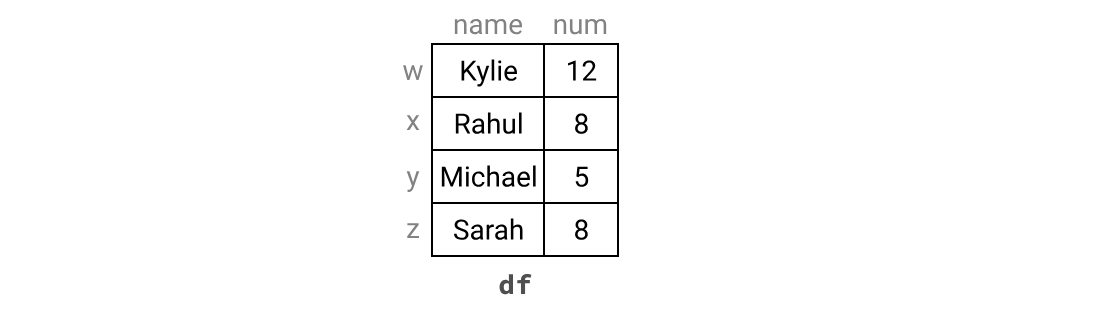

Let's check which people have a favorite number of 8. First, we perform a vectorized boolean operation that produces a boolean series:

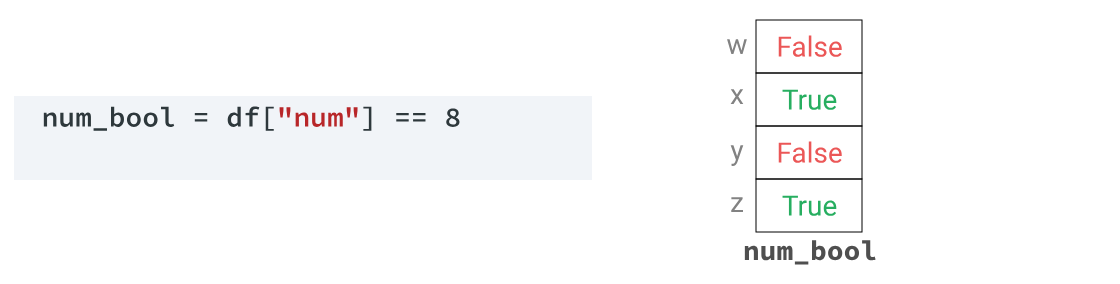

We can use that series to index the whole dataframe, leaving us with the rows that correspond only to people whose favorite number is 8:

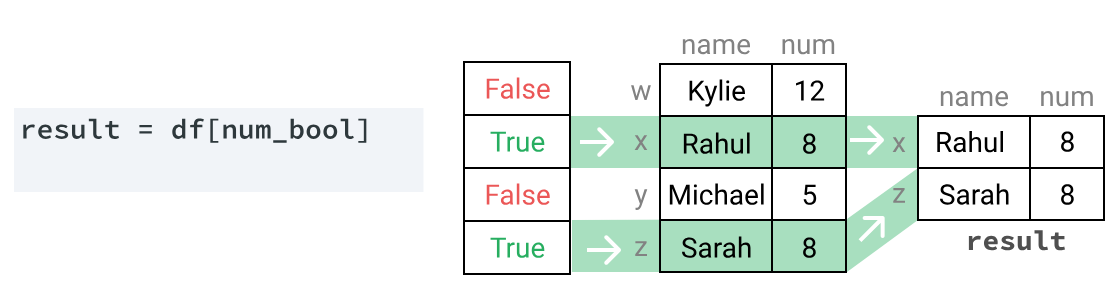

Note that we didn't use loc[]. This is because boolean arrays use the same shortcut as slices to select along the index axis. We can also use the boolean series to index just one column of the dataframe:

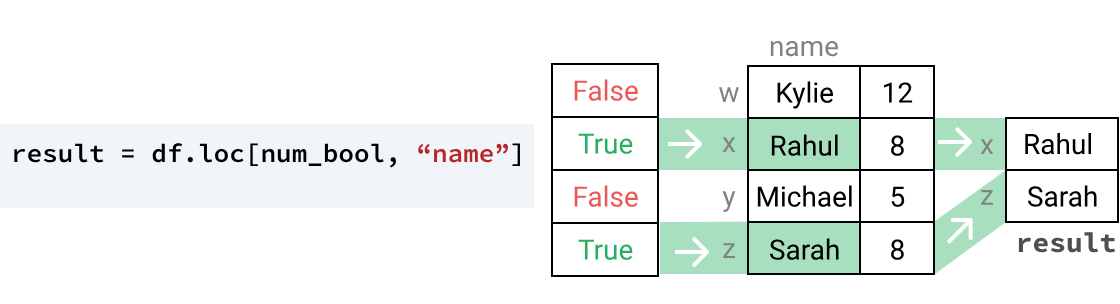

In this case, we used df.loc[] to specify both axes.

Next, let's use boolean indexing to identify companies belonging to the "Motor Vehicles and Parts" industry in our Fortune 500 dataset.

In [44]:
motor_bool = f500['industry'] =='Motor Vehicles and Parts'

motor_countries = f500.loc[motor_bool, 'country']

In [45]:
motor_countries

0
Toyota Motor                                 Japan
Volkswagen                                 Germany
Daimler                                    Germany
General Motors                                 USA
Ford Motor                                     USA
Honda Motor                                  Japan
SAIC Motor                                   China
Nissan Motor                                 Japan
BMW Group                                  Germany
Dongfeng Motor                               China
Robert Bosch                               Germany
Hyundai Motor                          South Korea
China FAW Group                              China
Beijing Automotive Group                     China
Peugeot                                     France
Renault                                     France
Kia Motors                             South Korea
Continental                                Germany
Denso                                        Japan
Guangzhou Automobile Industry

## Using Boolean Arrays to Assign Values

We now have all the knowledge we need to fix the 0 values in the previous_rank column:



- Perform assignment in pandas.
- Use boolean indexing in pandas.

Let's look at an example of how we combine these two operations together. For our example, we'll change the 'Motor Vehicles & Parts' values in the sector column to 'Motor Vehicles and Parts'– i.e. we will change the ampersand (&) to and.

In [46]:
ampersand_bool = f500["sector"] == "Motor Vehicles & Parts"

Next, we use that boolean series and the string "sector" to perform the assignment.

In [47]:
f500.loc[ampersand_bool,"sector"] = "Motor Vehicles and Parts"

Just like we saw in the NumPy lesson earlier in this course, we can remove the intermediate step of creating a boolean series, and combine everything into one line. This is the most common way to write pandas code to perform assignment using boolean arrays:

In [48]:
f500.loc[f500["sector"] == "Motor Vehicles & Parts","sector"] = "Motor Vehicles and Parts"

Now we can follow this pattern to replace the values in the previous_rank column. We'll replace these values with np.nan. Just like in NumPy, np.nan is used in pandas to represent values that can't be represented numerically, most commonly missing values.

In [55]:
import numpy as np
f500.loc[f500['previous_rank'] == 0, 'previous_rank'] = np.nan

In [56]:
prev_rank_before = f500["previous_rank"].value_counts(dropna=False).head()

This uses Series.value_counts() and Series.head() to display the 5 most common values in the previous_rank column, but adds an additional dropna=False parameter, which stops the Series.value_counts() method from excluding null values when it makes its calculation, as shown in the [Series.value_counts() documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html#pandas.Series.value_counts).

In [57]:
prev_rank_before

previous_rank
NaN      33
1.0       1
302.0     1
334.0     1
325.0     1
Name: count, dtype: int64

## Creating New Columns

The index of the series that Series.value_counts() produces now shows us floats like 471.0 instead of integers. The reason behind this is that pandas uses the NumPy integer dtype, which does not support NaN values. Pandas inherits this behavior, and in instances where you try and assign a NaN value to an integer column, pandas will silently convert that column to a float dtype. If you're interested in finding out more about this, there is a [specific section on integer NaN values in the pandas documentation](http://pandas.pydata.org/pandas-docs/stable/gotchas.html#nan-integer-na-values-and-na-type-promotions).

Now that we've corrected the data, let's create the rank_change series again. This time, we'll add it to our f500 dataframe as a new column.

When we assign a value or values to a new column label, pandas will create a new column in our dataframe. For example, below we add a new column to a dataframe named top5_rank_revenue:

Let's create a rank_change column in our f500 dataframe next.

In [59]:
f500['rank_change'] = f500['previous_rank'] - f500['rank']

In [60]:
f500['rank_change'].describe()

count    467.000000
mean      -3.533191
std       44.293603
min     -199.000000
25%      -21.000000
50%       -2.000000
75%       10.000000
max      226.000000
Name: rank_change, dtype: float64

## Challenge: Top Performers by Country

We'll finish this lesson with a challenge. 

In this challenge, we'll calculate a specific statistic or attribute of each of the two most common countries from our f500 dataframe.

Like the DataFrame.head() method, the Series.head() method returns the first five items from a series by default, or a different number if you provide an argument, like above.

In [66]:
f500.loc[f500['country'] == 'USA', 'industry'].value_counts().head(2)

industry
Banks: Commercial and Savings               8
Insurance: Property and Casualty (Stock)    7
Name: count, dtype: int64

In [69]:
f500.loc[f500['country'] == 'China', 'sector'].value_counts().head(3)

sector
Financials     25
Energy         22
Wholesalers     9
Name: count, dtype: int64

In this lesson, we learned:

- How to select data from pandas objects using boolean arrays.
- How to assign data using labels and boolean arrays.
- How to create new columns in pandas.
- Many new methods to make data analysis easier in pandas.